In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import regression as reg

from scipy import stats
from matplotlib import pyplot as plt

In [3]:
df_coreness = pd.read_csv("coreness_igos.csv")
df_coreness.head(5)

,id,coreness
0,russia,0.165909
1,mauritania,0.159091
2,tunisia,0.955357
3,saudiarabia,0.193182
4,uae,0.113636


<AxesSubplot: ylabel='Count'>

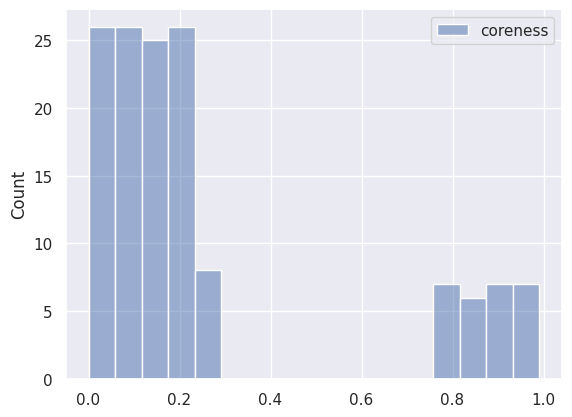

In [4]:
sns.histplot(df_coreness)

In [5]:
th = 0.4
centrais = df_coreness.loc[df_coreness.coreness > th]
perifericos = df_coreness.loc[df_coreness.coreness <= th]
centrais.shape, perifericos.shape

((27, 2), (111, 2))

In [6]:
# A planilha do excel tem macros e múltiplas abas, precisa dessa engine pra abrir.
!pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 2.8 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.0 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [7]:
df_happiness = pd.read_csv("2015.csv")
df_happiness.head(5)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [8]:
notacao_diff = {
    "unitedstates": "usa",
    "unitedkingdom": "uk",
    "centralafricanrepublic": "car",
    "southkorea": "sokorea",
    "czechrepublic": "czechrep",
    "southafrica": "soafrica",
    "dominicanrepublic": "domrepublic",
    "macedonia": "fyromacedonia",
    "unitedarabemirates": "uae",
}

def clean_countrys(country):
    country = country.lower().replace("\n", "").replace(" ", "")
    if country in notacao_diff:
        return notacao_diff[country]
    return country

In [20]:
df_happiness['Country'] = df_happiness["Country"].apply(clean_countrys)
df_happiness

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [10]:
# Confirma que nao há diferenca nos ids dos dois datasets
df_coreness.loc[~df_coreness.id.isin(df_happiness["Country"])]

,id,coreness


In [41]:
data = df_coreness.merge(df_happiness, how='inner', left_on='id', right_on='Country')
data.head(10)

,id,coreness,is_central,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,russia,0.165909,False,russia,Central and Eastern Europe,64,5.716,0.03135,1.13764,1.23617,0.66926,0.36679,0.03005,0.00199,2.27394
1,mauritania,0.159091,False,mauritania,Sub-Saharan Africa,124,4.436,0.03947,0.45407,0.86908,0.35874,0.24232,0.17461,0.21900,2.11773
2,tunisia,0.955357,True,tunisia,Middle East and Northern Africa,107,4.739,0.03589,0.88113,0.60429,0.73793,0.26268,0.06358,0.06431,2.12466
3,saudiarabia,0.193182,False,saudiarabia,Middle East and Northern Africa,35,6.411,0.04633,1.39541,1.08393,0.72025,0.31048,0.32524,0.13706,2.43872
4,uae,0.113636,False,uae,Middle East and Northern Africa,20,6.901,0.03729,1.42727,1.12575,0.80925,0.64157,0.38583,0.26428,2.24743
5,czechrep,0.161364,False,czechrep,Central and Eastern Europe,31,6.505,0.04168,1.17898,1.20643,0.84483,0.46364,0.02652,0.10686,2.67782
6,philippines,0.218182,False,philippines,Southeastern Asia,90,5.073,0.04934,0.70532,1.03516,0.58114,0.62545,0.12279,0.24991,1.75360
7,ukraine,0.079545,False,ukraine,Central and Eastern Europe,111,4.681,0.04412,0.79907,1.20278,0.67390,0.25123,0.02961,0.15275,1.57140
8,montenegro,0.027273,False,montenegro,Central and Eastern Europe,82,5.192,0.05235,0.97438,0.90557,0.72521,0.18260,0.14296,0.16140,2.10017
9,estonia,0.118182,False,estonia,Central and Eastern Europe,73,5.429,0.04013,1.15174,1.22791,0.77361,0.44888,0.15184,0.08680,1.58782


In [17]:
# Centrais
data_centrais = centrais.merge(df_happiness, how='inner', left_on='id', right_on='Country')
# Perifericos
data_perifericos = perifericos.merge(df_happiness, how='inner', left_on='id', right_on='Country')

In [61]:
paises_oeste_europeu = {
    "belgium", 'germany', 'france', 'ireland', 'uk', 'switzerland', 'netherlands',
    'finland', 'spain', 'italy', 'portugal', 'greece', 'sweden', 'norway', 'luxembourg',
    'austria', 'denmark', 'iceland'
}
recorte_oe_eu = data_perifericos.loc[data_perifericos.id.isin(paises_leste_europeu)]
recorte_noe = data_perifericos.loc[~data_perifericos.id.isin(paises_leste_europeu)]

In [29]:
paises_africanos = {
    'mauritania', 'tunisia', 'cameroon', 'morocco', 'algeria',
    'ivorycoast', 'ghana', 'burundi', 'rwanda', 'libya', 'uganda',
    'chad', 'malawi', 'sierraleone', 'comoros', 'djibouti', 'mali',
    'niger', 'zimbabwe', 'angola', 'mozambique', 'car', 'guinea',
    'madagascar', 'benin', 'mauritius', 'kenya', 'tanzania', 'burkinafaso',
    'zambia', 'liberia', 'uganda', 'guinea', 'egypt', 'nigeria', 'senegal', 'soafrica'
}
len(data_centrais)

27

In [71]:
recorte_n_sa = data_centrais.loc[data_centrais.Region != "Western Europe"]
recorte_n_sa

,id,coreness,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,tunisia,0.955357,tunisia,Middle East and Northern Africa,107,4.739,0.03589,0.88113,0.60429,0.73793,0.26268,0.06358,0.06431,2.12466
1,cameroon,0.964286,cameroon,Sub-Saharan Africa,133,4.252,0.04678,0.42250,0.88767,0.23402,0.49309,0.05786,0.20618,1.95071
2,morocco,0.991071,morocco,Middle East and Northern Africa,92,5.013,0.03420,0.73479,0.64095,0.60954,0.41691,0.08546,0.07172,2.45373
5,nigeria,0.875000,nigeria,Sub-Saharan Africa,78,5.268,0.04192,0.65435,0.90432,0.16007,0.34334,0.04030,0.27233,2.89319
8,soafrica,0.785714,soafrica,Sub-Saharan Africa,113,4.642,0.04585,0.92049,1.18468,0.27688,0.33207,0.08884,0.11973,1.71956
10,sokorea,0.892857,sokorea,Eastern Asia,47,5.984,0.04098,1.24461,0.95774,0.96538,0.33208,0.07857,0.18557,2.21978
11,kenya,0.928571,kenya,Sub-Saharan Africa,125,4.419,0.04734,0.36471,0.99876,0.41435,0.42215,0.05839,0.37542,1.78555
13,senegal,0.919643,senegal,Sub-Saharan Africa,142,3.904,0.03608,0.36498,0.97619,0.43540,0.36772,0.10713,0.20843,1.44395
15,mauritius,0.982143,mauritius,Sub-Saharan Africa,71,5.477,0.07197,1.00761,0.98521,0.70950,0.56066,0.07521,0.37744,1.76145
16,pakistan,0.812500,pakistan,Southern Asia,81,5.194,0.03726,0.59543,0.41411,0.51466,0.12102,0.10464,0.33671,3.10709


In [68]:
data_centrais.sort_values(by='coreness')

,id,coreness,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
21,sweden,0.758929,sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
25,uk,0.767857,uk,Western Europe,21,6.867,0.01866,1.26637,1.28548,0.90943,0.59625,0.32067,0.51912,1.96994
3,belgium,0.776786,belgium,Western Europe,19,6.937,0.03595,1.30782,1.28566,0.89667,0.58450,0.22540,0.22250,2.41484
8,soafrica,0.785714,soafrica,Sub-Saharan Africa,113,4.642,0.04585,0.92049,1.18468,0.27688,0.33207,0.08884,0.11973,1.71956
7,italy,0.794643,italy,Western Europe,50,5.948,0.03914,1.25114,1.19777,0.95446,0.26236,0.02901,0.22823,2.02518
22,india,0.803571,india,Southern Asia,117,4.565,0.02043,0.64499,0.38174,0.51529,0.39786,0.08492,0.26475,2.27513
16,pakistan,0.812500,pakistan,Southern Asia,81,5.194,0.03726,0.59543,0.41411,0.51466,0.12102,0.10464,0.33671,3.10709
20,malaysia,0.821429,malaysia,Southeastern Asia,61,5.770,0.04330,1.12486,1.07023,0.72394,0.53024,0.10501,0.33075,1.88541
9,portugal,0.830357,portugal,Western Europe,88,5.102,0.04802,1.15991,1.13935,0.87519,0.51469,0.01078,0.13719,1.26462
4,switzerland,0.839286,switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738


In [64]:
recorte_nao_af = data_perifericos.loc[~data_perifericos.id.isin(paises_africanos)]
recorte_nao_af

,id,coreness,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,russia,0.165909,russia,Central and Eastern Europe,64,5.716,0.03135,1.13764,1.23617,0.66926,0.36679,0.03005,0.00199,2.27394
2,saudiarabia,0.193182,saudiarabia,Middle East and Northern Africa,35,6.411,0.04633,1.39541,1.08393,0.72025,0.31048,0.32524,0.13706,2.43872
3,uae,0.113636,uae,Middle East and Northern Africa,20,6.901,0.03729,1.42727,1.12575,0.80925,0.64157,0.38583,0.26428,2.24743
4,czechrep,0.161364,czechrep,Central and Eastern Europe,31,6.505,0.04168,1.17898,1.20643,0.84483,0.46364,0.02652,0.10686,2.67782
5,philippines,0.218182,philippines,Southeastern Asia,90,5.073,0.04934,0.70532,1.03516,0.58114,0.62545,0.12279,0.24991,1.75360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,bolivia,0.134091,bolivia,Latin America and Caribbean,51,5.890,0.05642,0.68133,0.97841,0.53920,0.57414,0.08800,0.20536,2.82334
107,laos,0.009091,laos,Southeastern Asia,99,4.876,0.06698,0.59066,0.73803,0.54909,0.59591,0.24249,0.42192,1.73799
108,elsalvador,0.018182,elsalvador,Latin America and Caribbean,42,6.130,0.05618,0.76454,1.02507,0.67737,0.40350,0.11776,0.10692,3.03500
109,nepal,0.045455,nepal,Southern Asia,121,4.514,0.03607,0.35997,0.86449,0.56874,0.38282,0.05907,0.32296,1.95637


In [70]:
# Reg recorte
result = reg.linear(
    data=recorte_n_sa, 
    formula='Q("Happiness Score") ~ coreness + Q("Trust (Government Corruption)") + Q("Economy (GDP per Capita)") + Q("Health (Life Expectancy)")'
)
result.micro_summary()

variable,coefficient,std error,p-value
coreness,0.201121,1.167233,0.865500
"Q(""Trust (Government Corruption)"")",4.529913,0.799850,0.000045
"Q(""Economy (GDP per Capita)"")",1.132630,0.983096,0.267310
"Q(""Health (Life Expectancy)"")",1.714598,1.409266,0.242532


In [39]:
# Reg centrais
result = reg.linear(
    data=data_centrais, 
    formula='Q("Happiness Score") ~ coreness + Q("Trust (Government Corruption)") + Q("Economy (GDP per Capita)") + Q("Health (Life Expectancy)")'
)
result.micro_summary()

variable,coefficient,std error,p-value
coreness,0.265651,1.277424,0.837174
"Q(""Trust (Government Corruption)"")",3.745022,0.773824,0.000078
"Q(""Economy (GDP per Capita)"")",1.893605,0.576852,0.003399
"Q(""Health (Life Expectancy)"")",0.600504,0.658000,0.371336


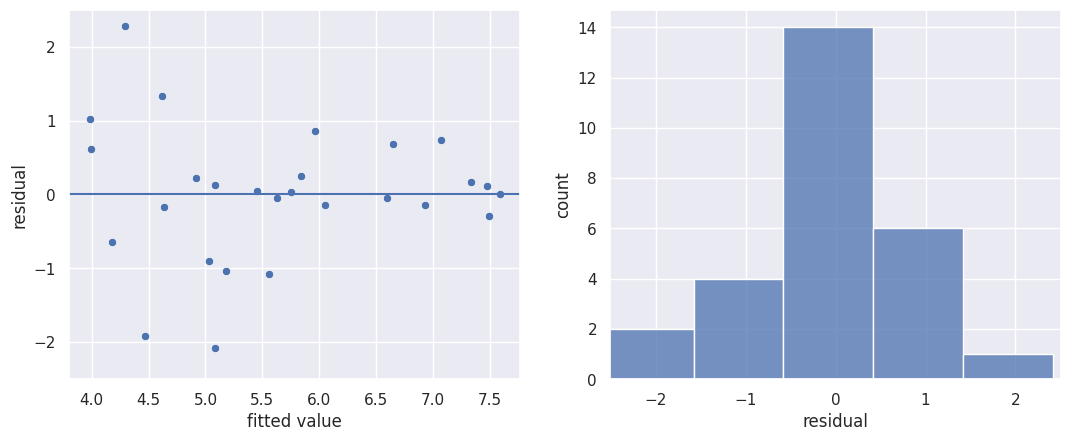

In [50]:
result.plot_residuals()

In [53]:
result = reg.linear(
    data=data_perifericos,
    formula='Q("Happiness Score") ~ coreness + Q("Trust (Government Corruption)") + Q("Economy (GDP per Capita)") + Q("Health (Life Expectancy)")'
)
result.micro_summary()

variable,coefficient,std error,p-value
coreness,2.092392,0.962857,0.031999
"Q(""Trust (Government Corruption)"")",1.332453,0.595598,0.027368
"Q(""Economy (GDP per Capita)"")",1.394942,0.296118,0.000008
"Q(""Health (Life Expectancy)"")",1.347046,0.508543,0.009312


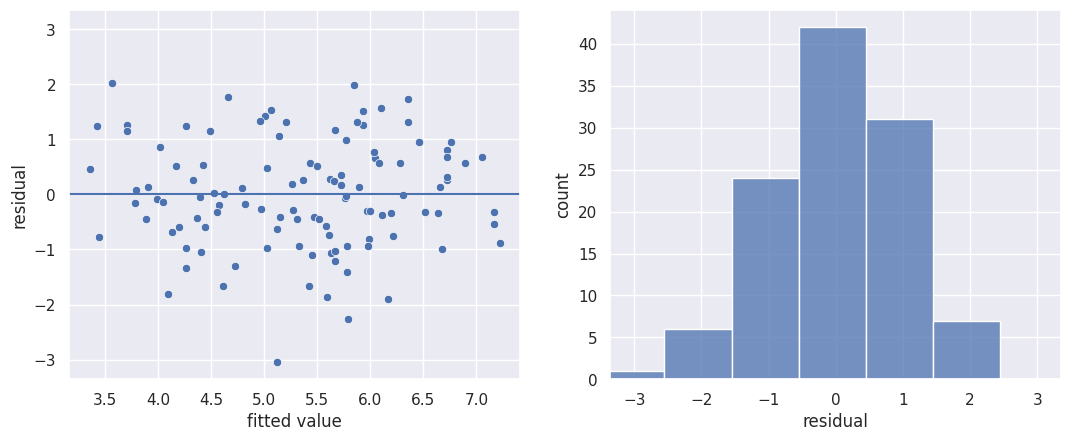

In [54]:
result.plot_residuals()

In [57]:
result = reg.linear(
    data=data,
    formula='Q("Happiness Score") ~ coreness + Q("Trust (Government Corruption)") + Q("Economy (GDP per Capita)") + Q("Health (Life Expectancy)")'
)
result.micro_summary()

variable,coefficient,std error,p-value
coreness,0.074705,0.190183,0.695091
"Q(""Trust (Government Corruption)"")",1.710719,0.506410,0.000958
"Q(""Economy (GDP per Capita)"")",1.461738,0.268076,0.000000
"Q(""Health (Life Expectancy)"")",1.413753,0.427222,0.001204


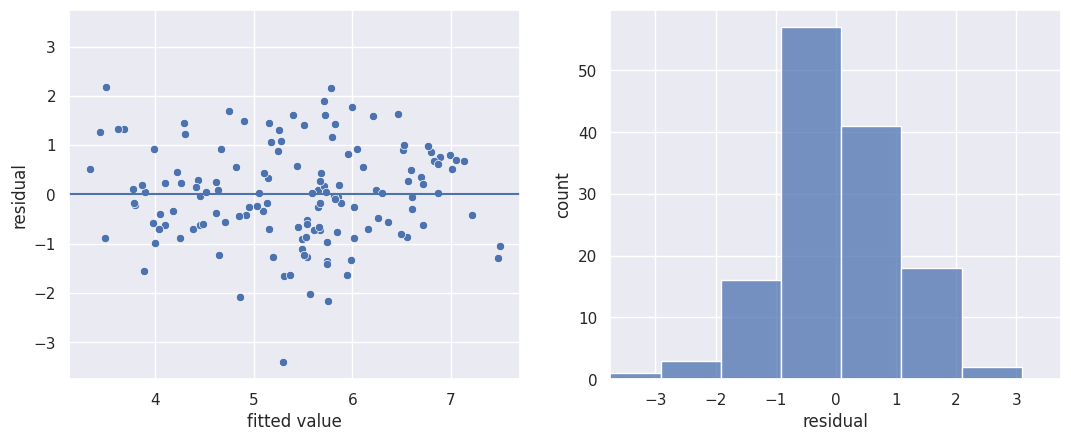

In [58]:
result.plot_residuals()